In [1]:
import pickle
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import os
from collections import defaultdict
import re
import json
from collections import Counter
import dateutil
from dateutil import parser
from collections import defaultdict
from __future__ import division
import datetime
%pylab inline
from numpy import arange
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [10]:
history_keys_dic = defaultdict(dict)
for key in data.keys():
    if 'Horror' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_keys_dic['count'][year]= history_keys_dic['count'].get(year, 0) + 1  
history_df = pd.DataFrame.from_dict(history_keys_dic)
start = pd.datetime(1972, 1, 1)
end = pd.datetime(2016, 1, 1)
x = pd.date_range(start, end, freq='A').year
history_df_years = history_df.reindex(x)
history_df = history_df_years.fillna(0)
history_df['cumulative mean']=pd.expanding_mean(history_df['count']).shift(+1)
history_df['difference from mean']=history_df['count']/history_df['cumulative mean']

In [11]:
history_df

,count,cumulative mean,difference from mean
1972,6,NaN,NaN
1973,11,6.000000,1.833333
1974,8,8.500000,0.941176
1975,6,8.333333,0.720000
1976,17,7.750000,2.193548
1977,14,9.600000,1.458333
1978,18,10.333333,1.741935
1979,15,11.428571,1.312500
1980,15,11.875000,1.263158
1981,18,12.222222,1.472727


In [6]:
def parseint(string):
    string = str(string)
    return int(''.join([x for x in string if x.isdigit()]))

In [7]:
with open('movie_info_revised.p' ,'r') as picklefile:
    data = pickle.load(picklefile)

In [9]:
def date_helper(date):
    try:
        date = parser.parse(date)
        return True
    except: 
        pass
    return False

In [12]:
history_dic = defaultdict(dict)
history_dic = defaultdict(dict)
def get_genre(genre):
    dic = history_dic
    for key in data.keys():
        if genre in data[key]['genre']:
            if date_helper(data[key]['date']):
                year = parser.parse(data[key]['date']).year
                dic[year][key]= defaultdict(dict)
                dic[year][key]['date']= data[key]['date']
                dic[year][key]['screens']= data[key]['screens']
                dic[year][key]['opening']= data[key]['opening']
                #space_dic['space'][year].append(key,)
    frames = []
    years = []
    for year, movies in dic.items():
        years.append(year)
        frames.append(pd.DataFrame.from_dict(movies, orient='index'))
    genre = pd.concat(frames, keys=years)
    genre = genre[genre.screens != 'N/A']
    genre = genre[genre.screens != 'n/a']
    genre = genre[genre.screens != 'Error']
    genre = genre[genre.opening != 'N/A']
    genre = genre[genre.opening != 'n/a']
    genre = genre[genre.opening != 'Error']
    genre['opening'] = genre['opening'].map(lambda x: parseint(x))
    genre['screens'] = genre['screens'].map(lambda x: parseint(x))
    genre['date'] = genre['date'].map(lambda x: parser.parse(x))
    genre['normalized_opening']= genre['opening']/genre['screens']
    return genre

In [23]:
history_dic = defaultdict(dict)
for key in data.keys():
    if 'Horror' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_dic[year][key]= defaultdict(dict)
            history_dic[year][key]['date']= data[key]['date']
            history_dic[year][key]['screens']= data[key]['screens']
            history_dic[year][key]['opening']= data[key]['opening']
                #space_dic['space'][year].append(key,)

defaultdict(<type 'dict'>, {1970: {'The Adventures of Gerard': defaultdict(<type 'dict'>, {'date': '3 July 1970', 'screens': 'Error', 'opening': 'N/A'})}, 1972: {'1776': defaultdict(<type 'dict'>, {'date': '17 November 1972', 'screens': 'Error', 'opening': 'N/A'}), 'Antony and Cleopatra': defaultdict(<type 'dict'>, {'date': '18 March 1972', 'screens': 'Error', 'opening': 'N/A'}), 'Brother Sun, Sister Moon': defaultdict(<type 'dict'>, {'date': '2 December 1972', 'screens': 'Error', 'opening': 'N/A'})}, 1973: {'Executive Action': defaultdict(<type 'dict'>, {'date': '7 November 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Hitler: The Last Ten Days': defaultdict(<type 'dict'>, {'date': '9 May 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Jesus Christ Superstar': defaultdict(<type 'dict'>, {'date': '15 August 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Pat Garrett  Billy the Kid': defaultdict(<type 'dict'>, {'date': '31 August 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Massacr

In [13]:
genre

In [86]:
history_dic[1986]["Critters"]['screens']=540

In [43]:
history_dic[2012]["Storage 24"]['opening']='N/A'

In [115]:
history_dic[2008]['Changeling']['screens']=2850

In [107]:
def makedf(genre):
    frames = []
    years = []
    for year, movies in genre.items():
        years.append(year)
        frames.append(pd.DataFrame.from_dict(movies, orient='index'))
    genre = pd.concat(frames, keys=years)
    genre = genre[genre.screens != 'N/A']
    genre = genre[genre.screens != 'n/a']
    genre = genre[genre.screens != 'Error']
    genre = genre[genre.opening != 'N/A']
    genre = genre[genre.screens != '']
    genre = genre[genre.opening != '']
    genre = genre[genre.opening != 'n/a']
    genre = genre[genre.opening != 'Error']
    genre['opening'] = genre['opening'].map(lambda x: parseint(x))
    genre['screens'] = genre['screens'].map(lambda x: parseint(x))
    genre['date'] = genre['date'].map(lambda x: parser.parse(x))
    genre['normalized_opening']= genre['opening']/genre['screens']
    genre = genre[genre.normalized_opening < 17000]
    return genre

In [108]:
genre = makedf(history_dic)
genre

date  screens  \
1976 King Kong                                          1976-12-17      974   
     The Omen                                           1976-06-25      515   
1977 Exorcist II: The Heretic                           1977-06-17      703   
1978 Damien: Omen II                                    1978-06-09      525   
     Jaws 2                                             1978-06-16      640   
1979 Dracula                                            1979-07-20      395   
     The Amityville Horror                              1979-07-27      748   
1980 Friday the 13th                                    1980-05-09     1100   
     The Awakening                                      1980-10-31      909   
1981 An American Werewolf in London                     1981-08-21      870   
     Ghost Story                                        1981-12-18      548   
     Halloween II                                       1981-10-30     1211   
     Student Bodies                                     1981-08-07      628   
     The Final Conflict                                 1981-03-20      918   
     The Funhouse                                       1981-03-13      814   
     The Hand                                           1981-04-24      183   
     Wolfen                                             1981-07-24      967   
1982 Amityville II: The Possession                      1982-09-24     1200   
     Class Reunion                                      1982-10-29     1121   
     Creepshow                                          1982-11-12     1127   
     Friday the 13th Part III                           1982-08-13     1079   
     Halloween III: Season of the Witch                 1982-10-22     1297   
     Silent Rage                                        1982-04-02     1458   
     The Thing                                          1982-06-25      840   
     Venom                                              1982-01-29      900   
     Visiting Hours                                     1982-05-28     1176   
1983 Amityville 3-D                                     1983-11-18     1254   
     Cujo                                               1983-08-12     1239   
     Jaws 3-D                                           1983-07-22     1300   
     Psycho II                                          1983-06-03     1448   
     Sleepaway Camp                                     1983-11-18       85   
     The Dead Zone                                      1983-10-21     1293   
     The Entity                                         1983-02-04     1031   
     The Hunger                                         1983-04-29      775   
     The Keep                                           1983-12-16      508   
     Twilight Zone: The Movie                           1983-06-24     1275   
     Videodrome                                         1983-02-04      600   
1984 A Nightmare on Elm Street                          1984-11-16     1098   
     Firestarter                                        1984-05-11     1356   
     Gremlins                                           1984-06-08     1511   
     Night of the Comet                                 1984-11-16     1098   
     Ninja III: The Domination                          1984-09-14      530   
     Razorback                                          1984-11-16       50   
     Silent Night, Deadly Night                         1984-11-09      398   
     Terror in the Aisles                               1984-10-26     1127   
1985 A Nightmare on Elm Street 2: Freddy's Revenge      1985-11-01      522   
     Creature                                           1985-05-08      186   
     Day of the Dead                                    1985-07-19      168   
     Friday the 13th: A New Beginning                   1985-03-22     1759   
     Fright Night                                       1985-08-02     1542   
     Lifeforce                   

In [118]:
genre['opening'] = genre['opening'].map(lambda x: parseint(x))

In [86]:
genre['screens'] = genre['screens'].map(lambda x: parseint(x))

In [20]:
pd.set_option('display.max_rows', 1000)

In [84]:
genre

date  screens  \
1976 King Kong                                          1976-12-17      974   
     The Omen                                           1976-06-25      515   
1977 Exorcist II: The Heretic                           1977-06-17      703   
1978 Damien: Omen II                                    1978-06-09      525   
     Jaws 2                                             1978-06-16      640   
1979 Alien                                              1979-05-25       91   
     Dracula                                            1979-07-20      395   
     The Amityville Horror                              1979-07-27      748   
1980 Altered States                                     1980-12-25        3   
     Friday the 13th                                    1980-05-09     1100   
     The Awakening                                      1980-10-31      909   
     The Shining                                        1980-05-23       10   
1981 An American Werewolf in London                     1981-08-21      870   
     Ghost Story                                        1981-12-18      548   
     Halloween II                                       1981-10-30     1211   
     Student Bodies                                     1981-08-07      628   
     The Final Conflict                                 1981-03-20      918   
     The Funhouse                                       1981-03-13      814   
     The Hand                                           1981-04-24      183   
     Wolfen                                             1981-07-24      967   
1982 Amityville II: The Possession                      1982-09-24     1200   
     Cat People                                         1982-04-02        6   
     Class Reunion                                      1982-10-29     1121   
     Creepshow                                          1982-11-12     1127   
     Friday the 13th Part III                           1982-08-13     1079   
     Halloween III: Season of the Witch                 1982-10-22     1297   
     Silent Rage                                        1982-04-02     1458   
     The Thing                                          1982-06-25      840   
     Venom                                              1982-01-29      900   
     Visiting Hours                                     1982-05-28     1176   
1983 Amityville 3-D                                     1983-11-18     1254   
     Christine                                          1983-12-09      145   
     Cujo                                               1983-08-12     1239   
     Jaws 3-D                                           1983-07-22     1300   
     Nightmares                                         1983-09-09       14   
     Psycho II                                          1983-06-03     1448   
     Sleepaway Camp                                     1983-11-18       85   
     The Dead Zone                                      1983-10-21     1293   
     The Entity                                         1983-02-04     1031   
     The Hunger                                         1983-04-29      775   
     The Keep                                           1983-12-16      508   
     Twilight Zone: The Movie                           1983-06-24     1275   
     Videodrome                                         1983-02-04      600   
1984 A Nightmare on Elm Street                          1984-11-16     1098   
     C.H.U.D.                                           1984-08-31       31   
     Children of the Corn                               1984-03-09       35   
     Firestarter                                        1984-05-11     1356   
     Gremlins                                           1984-06-08     1511   
     Night of the Comet                                 1984-11-16     1098   
     Ninja III: The Domination                          1984-09-14      530   
     Razorback                   

In [91]:
genre1 = genre[genre.screens > 50]

In [93]:
trend1 = genre1[genre.screens > 200]

/Users/David/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [109]:
trend = genre1[52:104]
trend

date  screens  \
1986 Aliens                                        1986-07-18     1437   
     April Fool's Day                              1986-03-28     1202   
     Critters                                      1986-04-11      540   
     Deadly Friend                                 1986-10-10     1213   
     Haunted Honeymoon                             1986-07-25     1046   
     House                                         1986-02-28     1440   
     Invaders from Mars                            1986-06-06     1212   
     Jason Lives: Friday the 13th Part VI          1986-08-01     1610   
     King Kong Lives                               1986-12-19     1105   
     Link                                          1986-09-19      435   
     Little Shop of Horrors                        1986-12-19      866   
     Maximum Overdrive                             1986-07-25     1198   
     Nomads                                        1986-03-07      496   
     Psycho III                                    1986-07-02     1408   
     The Fly                                       1986-08-15     1195   
     The Texas Chainsaw Massacre 2                 1986-08-22     1474   
     The Wraith                                    1986-11-21      588   
     Trick or Treat                                1986-10-24     1267   
     Troll                                         1986-01-17      959   
     Vamp                                          1986-07-18     1104   
1987 A Nightmare on Elm Street 3: Dream Warriors   1987-02-27     1343   
     Angel Heart                                   1987-03-06      815   
     Creepshow 2                                   1987-05-01      867   
     Dead of Winter                                1987-02-06      491   
     Evil Dead II                                  1987-03-13      310   
     Jaws: The Revenge                             1987-07-17     1606   
     Near Dark                                     1987-10-02      262   
     Prince of Darkness                            1987-10-23     1239   
     Prom Night II                                 1987-11-13      343   
     Return to Horror High                         1987-01-28      227   
     The Gate                                      1987-05-15     1139   
     The Hidden                                    1987-10-30     1045   
     The Lost Boys                                 1987-07-31     1027   
     The Witches of Eastwick                       1987-06-12     1103   
1988 A Nightmare on Elm Street 4: The Dream Master 1988-08-19     1765   
     Bad Dreams                                    1988-04-08     1180   
     Critters 2                                    1988-04-29     1114   
     Dead Heat                                     1988-05-06     1012   
     Elvira: Mistress of the Dark                  1988-09-30      627   
     Friday the 13th Part VII: The New Blood       1988-05-13     1796   
     Halloween 4: The Return of Michael Myers      1988-10-21     1679   
     Hellbound: Hellraiser II                      1988-12-23     1180   
     High Spirits                                  1988-11-18      825   
     Killer Klowns from Outer Space                1988-05-27      893   
     Monkey Shines                                 1988-07-29     1181   
     Phantasm II                                   1988-07-08     1227   
     Poltergeist III                               1988-06-10     1471   
     Return of the Living Dead II                  1988-01-15     1467   
     The Serpent and the Rainbow                   1988-02-05     1430   
     The Seventh Sign                              1988-04-01     1256   
     The Unholy                                    1988-01-08     1189   
     They Live                                     1988-11-04     1463   

                                                     opening  \
1986 Aliens                                         10052042   
     A

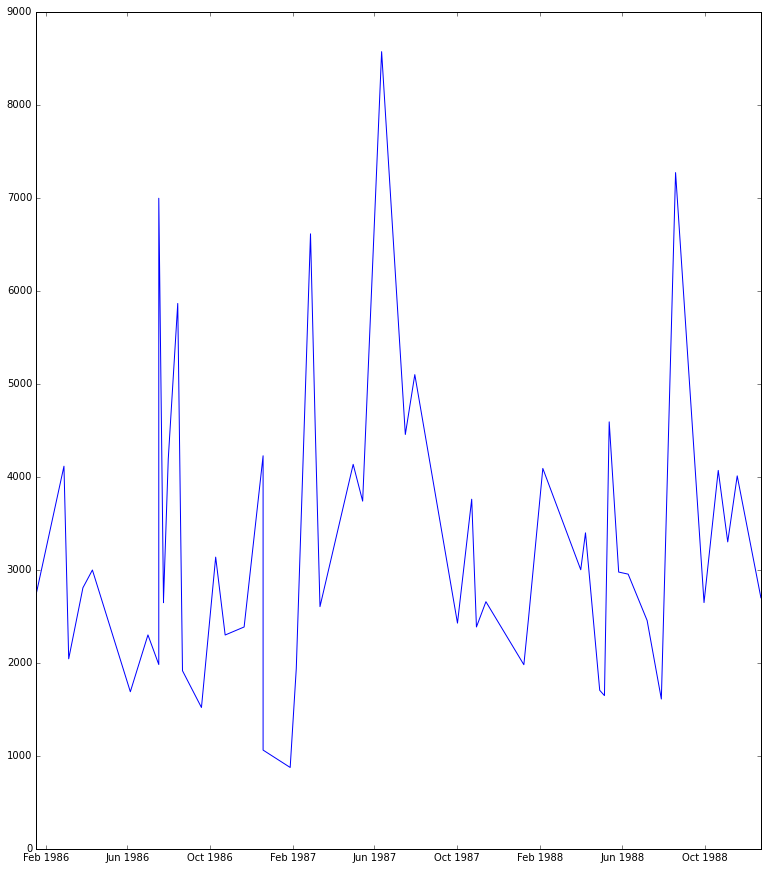

In [106]:
figure(figsize=(13,15))
trend = trend1.sort(['date'])
plt.plot(trend['date'], trend['normalized_opening'])

In [3]:
trend2 = genre1[294:340]
trend2

NameError: name 'genre1' is not defined

In [2]:
figure(figsize=(13,15))
trend = trend2.sort(['date'])
plt.plot(trend['date'], trend['normalized_opening'])

NameError: name 'trend2' is not defined

In [ ]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('2006-1-13')))
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

def sort_season(x):
    if x in [11, 12, 1]:
        return 4
    if x in [5, 6, 7, 8]:
        return 2
    if x in [9, 10,]:
        return 3
    if x in [2, 3, 4,]:
        return 1

trend['season']=trend['date'].apply(lambda x: sort_season(x.month))
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num + season', data = trend.reset_index(), return_type= 'dataframe')
model = sm.OLS(y, X)
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')